In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression,LinearRegression

C:\Users\HP PAVILION\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_excel('german_data.xlsx')

In [3]:
df.head(5)

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


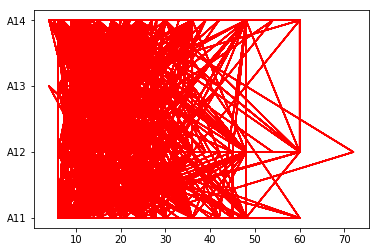

In [4]:
plt.plot(df['Duration_in_Months'],df['Status_Checking_Acc'],'r')
plt.show()

In [5]:
df2 = pd.get_dummies(df)

In [6]:
df2.head()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment,Count,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202
0,100001,6,1169,4,4,67,2,1,0,1,...,1,0,0,0,1,0,0,1,1,0
1,100002,48,5951,2,2,22,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,100003,12,2096,2,3,49,1,2,0,1,...,1,0,0,1,0,0,1,0,1,0
3,100004,42,7882,2,4,45,1,2,0,1,...,0,1,0,0,1,0,1,0,1,0
4,100005,24,4870,3,4,53,2,2,1,1,...,0,1,0,0,1,0,1,0,1,0


In [7]:
X = np.array(df2.drop(['Default_On_Payment','Customer_ID'], 1))

y = np.array(df2['Default_On_Payment'])

In [8]:
X = preprocessing.scale(X)

C:\Users\HP PAVILION\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [9]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [19]:
clf = LogisticRegression()

In [20]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
conf = clf.score(X_test,y_test)

In [22]:
conf

0.78900000000000003

In [23]:
#with   KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [26]:
conf = knn.score(X_test,y_test)

In [27]:
conf

0.78400000000000003

In [ ]:
#with decision tree

In [29]:
from sklearn import tree

In [30]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [31]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [32]:
conf = clf.score(X_test,y_test)

In [33]:
conf

1.0